In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [36]:
df=pd.read_csv('product j.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [37]:
sales_j= df.drop(['Product Name','Product Category','Month','Month No.','Year','Market Size', 'Marketing Expense'],axis=1)

In [38]:
sales_j.shape

(60, 1)

In [39]:
sales_j.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [40]:
sales_j['Sales'].sum()

4532957

Text(0.5, 1.0, 'Product J')

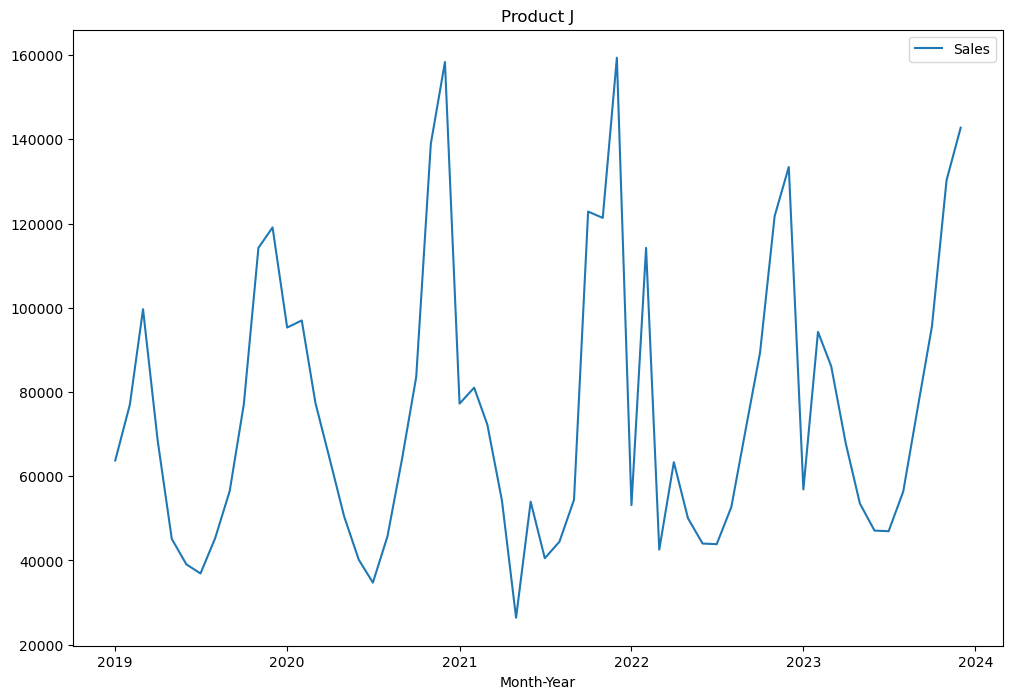

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_j)
plt.title('Product J')

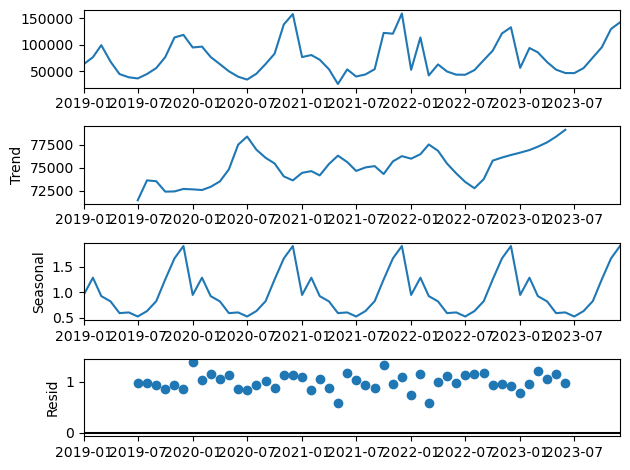

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_j, model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()


In [43]:
train= sales_j[:48]
test=sales_j[48:]

In [44]:
len(train)

48

In [45]:
model=ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [46]:
pred=model.forecast(12)

In [47]:
pred

2023-01-01     76878.607470
2023-02-01     98925.089599
2023-03-01     65346.594620
2023-04-01     61397.975614
2023-05-01     43008.414058
2023-06-01     46525.435660
2023-07-01     38920.797493
2023-08-01     46356.655454
2023-09-01     59895.048234
2023-10-01     96978.301502
2023-11-01    127376.620322
2023-12-01    148073.483817
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product J')

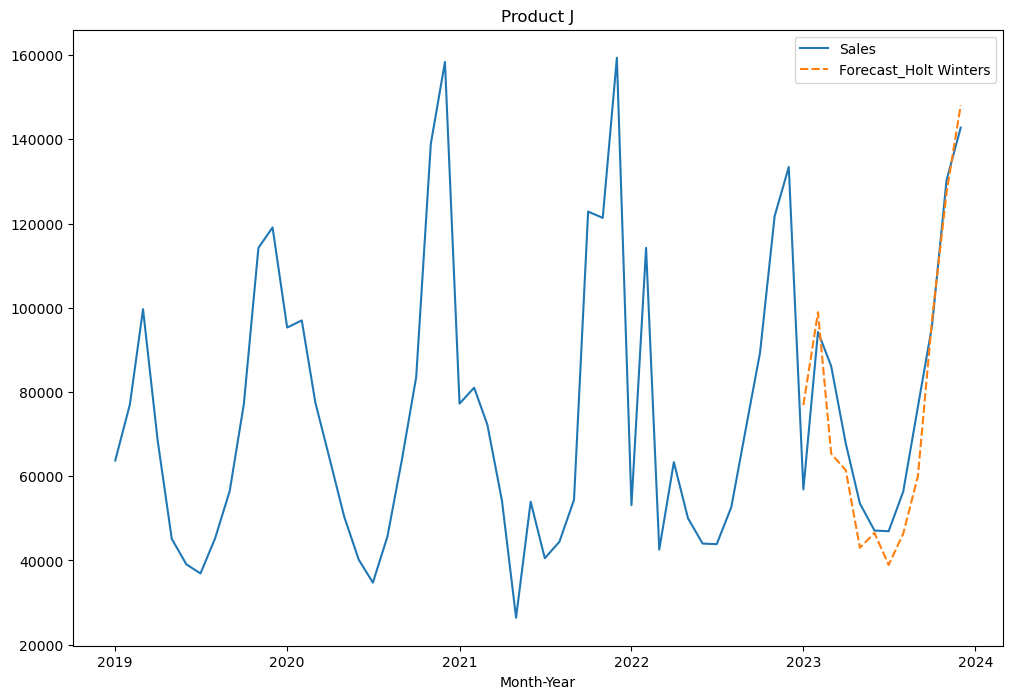

In [48]:
sales_j['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_j)
plt.title('Product J')

In [49]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 8916.911744317877
MAPE - Holt Winters: 0.13191642698684675
MSE - Holt Winters: 123413010.86410272
RMSE - Holt Winters: 11109.140869756884
